# Atividade 3

## Questão 1

Considere a base de dados disponível em https://www.openml.org/d/1460 (dica: no sklearn, você pode usar o fetch_openml para baixar a base). Usando o StratifiedKFold (fixe a semente em 42) com 10 folds, dentre os algoritmos de classificação Discriminante Linear, Discriminante Quadrático, Naive Bayes e Regressão Logística, o algoritmo com maior taxa de acurácia média no conjunto de teste é o **Discriminante Quadrático** e o algoritmo com maior AUC no conjunto de teste é o **Naive Bayes**.

In [21]:
from sklearn.datasets import fetch_openml

In [22]:
dataset = fetch_openml('banana')
X = dataset.data
y = dataset.target

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Accuracy for "LinearDiscriminantAnalysis": 55.99999999999999%
ROC Score for "LinearDiscriminantAnalysis": 54.82758428621444%

Accuracy for "QuadraticDiscriminantAnalysis": 62.188679245283005%
ROC Score for "QuadraticDiscriminantAnalysis": 64.89565985845755%

Accuracy for "GaussianNB": 61.33962264150943%
ROC Score for "GaussianNB": 66.47562897224917%

Accuracy for "LogisticRegression": 56.0188679245283%
ROC Score for "LogisticRegression": 54.82758428621444%



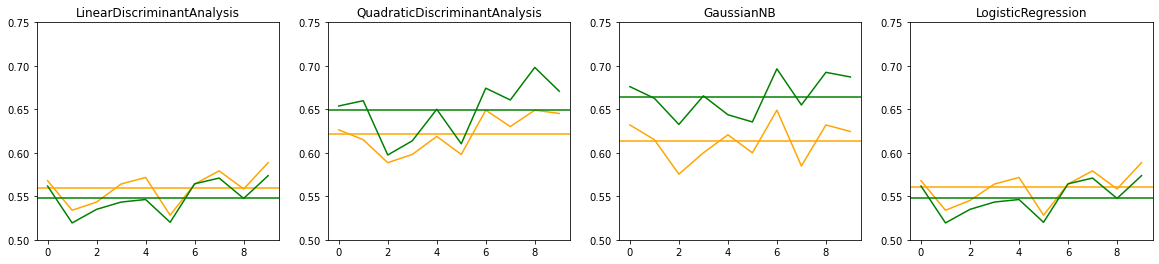

In [24]:
skf = StratifiedKFold(n_splits = 10, random_state=42, shuffle=True)
models = {
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression()
}
figure, axis = plt.subplots(1, len(models), figsize=(20,4))
x = [x for x in range(10)]

for i, (name, model) in enumerate(models.items()):
    accuracyScores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f'Accuracy for \"{name}\": {accuracyScores.mean() * 100}%')
    ROCScores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    print(f'ROC Score for \"{name}\": {ROCScores.mean() * 100}%\n')
    axis[i].plot(x, accuracyScores, color='orange')
    axis[i].axhline(y=accuracyScores.mean(), color='orange')
    axis[i].plot(x, ROCScores, color='green')
    axis[i].axhline(y=ROCScores.mean(), color='green')
    
    axis[i].set_ylim([0.5, 0.75])
    axis[i].set_title(name)

## Questão 2

Considere a base de dados disponível em neste link. Essa base de dados contém informações sobre o aluguel de bicicletas pela plataforma citybike. A coluna cnt é a quantidade de bicicletas alugadas por hora, o qual queremos predizer com base nos outros atributos. Crie um modelo de regressão linear usando o modelo LinearRegression da biblioteca sklearn. A seguir, normalize os coeficientes da regressão pelo desvio padrão de cada atributo. Após essa normalização, o atributo que tem o maior coeficiente é o **hum**, e o atributo com o menor coeficiente é o **atemp**.

In [25]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/amueller/ml-workshop-2-of-4/master/notebooks/data/bike_day_raw.csv')

In [26]:
X = dataset.drop('cnt', axis=1)
y = dataset['cnt']

In [27]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X, y)

LinearRegression()

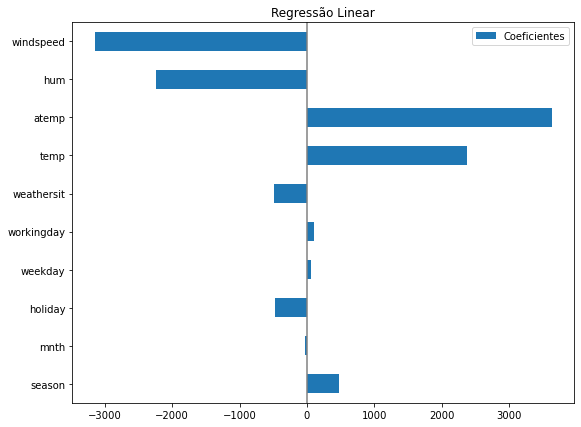

In [28]:
feat_stats = pd.DataFrame(linearRegression.coef_, index = X.columns, columns = ['Coeficientes'])
feat_stats.plot(kind='barh', figsize=(9, 7))
plt.title('Regressão Linear')
plt.axvline(x=0, color='.5')

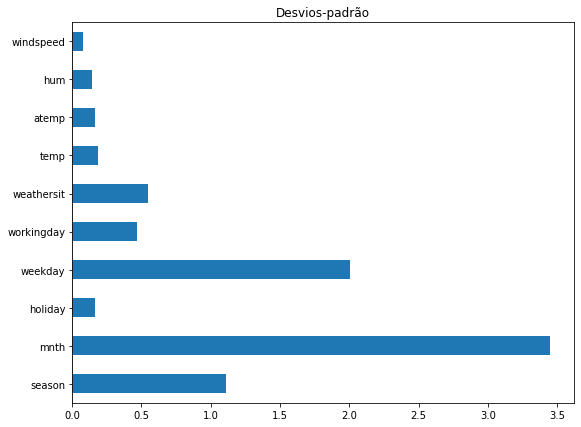

In [29]:
feat_stats['std'] = X.std(axis=0)
feat_stats['std'].plot(kind='barh', figsize=(9, 7))
plt.title('Desvios-padrão')
plt.axvline(x=0, color='.5')

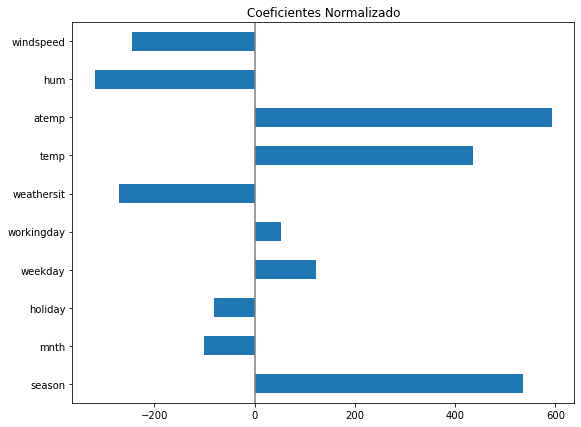

In [30]:
feat_stats['Coeficientes Normalizados'] = feat_stats['Coeficientes']*feat_stats['std']
feat_stats['Coeficientes Normalizados'].plot(kind='barh', figsize=(9, 7))
plt.title('Coeficientes Normalizado')
plt.axvline(x=0, color='.5')

## Questão 3

Considere a base de dados disponível em https://www.openml.org/d/44 (dica, você pode usar o
fetch_openml para carregar os dados). Usando o classificador k-Vizinhos mais próximos e a função de
scoring roc_auc_scorer, construa a validation_curve variando os vizinhos de 1 a 15. O valor de k que produz o maior valor de roc_auc_scorer médio de teste é **RESPOSTA**

In [37]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('spambase')
X = dataset.data
y = dataset.target

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier()
knn.fit(X, y)

n_neighbors = range(1, 15)